# A capstone project for Data Science & Big Data program,

# Presented by Njikang Clovis Mebinaji,

# Canadian Institute of Management & Technology (CIMT)-Malton Campus,

# 5 July 2022

### PROBLEM STATEMENT:

The aim of this project is to develop a Machine Learning model that can predict clients' subscription to a bank term deposit

based on client's 'age', 'job', 'marital status, 'education', 'account balance', 'duration of last call made to client',

'number of days past after client was contacted', and 'previous contact made to client before current campaign'.


### MOTIVATION:
1. To help financial institutions and any other third party refocus most of their financial resources toward  target customers only.
2. To save time and resources

### DATASET:

A total of 31,647 observations will be considered in order to build our model.

The features in our dataset include: age, job, marital status, education, balance, housing, loan, campaign, pdays, poutcome, subscribed.

# *Table of Content:*

### 1. Dataset Information
### 2. Collecting & Preprocessing of data
### 3. Exploratory Data Analysis (EDA)
### 4. Train & Test Data using Machine Learning Algorithm (Logistic Regression)
### 5. Conclusion & Final Conclusion


# 1. Dataset Information: Bank client data

## Dataset has the following columns

1 - ID : ID of client

2 - age (numeric)

3 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")

4 - marital : marital status (categorical: "divorced","married","single"; note: "divorced" means divorced or widowed)

5 - education (categorical: "primary","secondary","tertiary,"unknown")

6 - default: has credit in default? (categorical: "no","yes")

7 - balance : has money in account? (numeric)

8 - housing: has housing loan? (categorical: "no","yes")

9 - loan: has personal loan? (categorical: "no","yes")

10 - contact: contact communication type (categorical: "cellular","telephone")

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - day: last contact day of the week (categorical: "mon","tue","wed","thu","fri")

13 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

14 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

15 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

16 - previous: number of contacts performed before this campaign and for this client (numeric)

17 - poutcome: outcome of the previous marketing campaign (categorical: "failure","unknown","other","success")

Output variable (desired target):

18 - y - has the client subscribed a term deposit? (binary: "yes","no")

# 2. Collecting & Preprocessing of data


In [103]:
import pandas as pd
import numpy as np

In [104]:
original_df=pd.read_csv('banking_file.csv')
df=original_df.copy()
df.head(2)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no


In [105]:
df.drop(['ID', 'contact','day','month'], axis=1, inplace=True)

In [106]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,91,2,-1,0,unknown,no


In [107]:
# Dataset has no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   duration    31647 non-null  int64 
 9   campaign    31647 non-null  int64 
 10  pdays       31647 non-null  int64 
 11  previous    31647 non-null  int64 
 12  poutcome    31647 non-null  object
 13  subscribed  31647 non-null  object
dtypes: int64(6), object(8)
memory usage: 3.4+ MB


In [108]:
# 206 unknown job category 
df.job.value_counts()

blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

We need to assign the 206 unknown jobs other job titles in the dataset

In [109]:
# No. of customers with unknown job and tertiary education

df[(df.job=='unknown') & (df.education=='tertiary')].value_counts().sum()

23

In [110]:
df.loc[(df.job=='unknown') & (df.education=='tertiary'), 'job'] = 'management'

In [111]:
# No. of customers with unknown job and secondary education

df[(df.job=='unknown') & (df.education=='secondary')].value_counts().sum()

49

In [112]:
df.loc[(df.job=='unknown') & (df.education=='secondary'), 'job'] = 'technician'

In [113]:
# No. of customers with unknown job and primary education

df[(df.job=='unknown') & (df.education=='primary')].value_counts().sum()

37

In [114]:
df.loc[(df.job=='unknown') & (df.education=='primary'), 'job'] = 'housemaid'

In [115]:
# No. of customers with unknown job and unknown education

df[(df.job=='unknown') & (df.education=='unknown')].value_counts().sum()

97

In [116]:
df.loc[(df.job=='unknown') & (df.education=='unknown'), 'job'] = 'blue-collar'

In [117]:
df.job.value_counts()

blue-collar      6939
management       6662
technician       5356
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
housemaid         911
unemployed        905
student           635
Name: job, dtype: int64

In [118]:
df.education.value_counts()

secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

Similarly, we need to assign the 1314 unknown education an education class

In [119]:
df[(df.education=='unknown') & (df.job=='blue-collar')].value_counts().sum() #422
df.loc[(df.education=='unknown') & (df.job=='blue-collar'), 'education'] = 'secondary'

df[(df.education=='unknown') & (df.job=='management')].value_counts().sum() #165
df.loc[(df.education=='unknown') & (df.job=='management'), 'education'] = 'secondary' 

df[(df.education=='unknown') & (df.job=='technician')].value_counts().sum() #173
df.loc[(df.education=='unknown') & (df.job=='technician'), 'education'] = 'tertiary'

df[(df.education=='unknown') & (df.job=='admin.')].value_counts().sum() #114
df.loc[(df.education=='unknown') & (df.job=='admin.'), 'education'] = 'secondary'

df[(df.education=='unknown') & (df.job=='services')].value_counts().sum() #102
df.loc[(df.education=='unknown') & (df.job=='services'), 'education'] = 'tertiary'

df[(df.education=='unknown') & (df.job=='retired')].value_counts().sum() #82
df.loc[(df.education=='unknown') & (df.job=='retired'), 'education'] = 'secondary'

df[(df.education=='unknown') & (df.job=='self-employed')].value_counts().sum() #31
df.loc[(df.education=='unknown') & (df.job=='self-employed'), 'education'] = 'tertiary'

df[(df.education=='unknown') & (df.job=='entrepreneur')].value_counts().sum() #55
df.loc[(df.education=='unknown') & (df.job=='entrepreneur'), 'education'] = 'tertiary'

df[(df.education=='unknown') & (df.job=='housemaid')].value_counts().sum() #34
df.loc[(df.education=='unknown') & (df.job=='housemaid'), 'education'] = 'primary'

df[(df.education=='unknown') & (df.job=='unemployed')].value_counts().sum() #18
df.loc[(df.education=='unknown') & (df.job=='unemployed'), 'education'] = 'secondary'

df[(df.education=='unknown') & (df.job=='student')].value_counts().sum() #118
df.loc[(df.education=='unknown') & (df.job=='student'), 'education'] = 'secondary'


In [120]:
df.education.value_counts()

secondary    17143
tertiary      9662
primary       4842
Name: education, dtype: int64

In [121]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,no
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,no


In [122]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,no
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,no


df.drop(['marital', 'default', 'housing', 'loan', 'subscribe_del'], axis=1, inplace=True)

In [123]:
df.rename({'default':'cr_default', 'balance':'acc_bal', 'housing':'house_loan', 'loan':'pers_loan', 'campaign':'contact', 'pdays':'days_past', 'previous':'precontact'}, axis=1, inplace=True)

In [124]:
df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,no
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,no


# 3. Exploratory Data Analysis (EDA)



In [125]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.show()

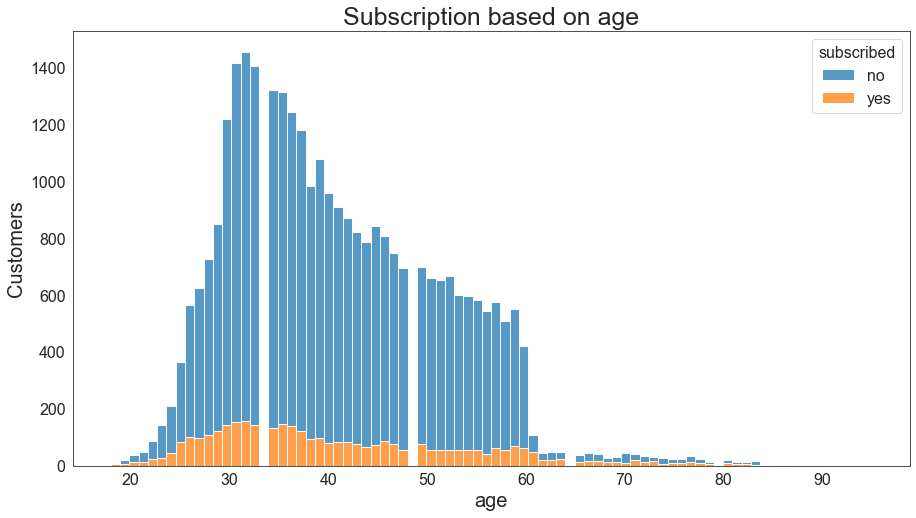

In [126]:
fig=plt.figure(figsize=[15,8])
sb.histplot(df, x = df.age, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on age', fontsize=25)
plt.xlabel('age', fontsize=20)
plt.ylabel('Customers', fontsize=20)
plt.savefig('age_customer.jpg')

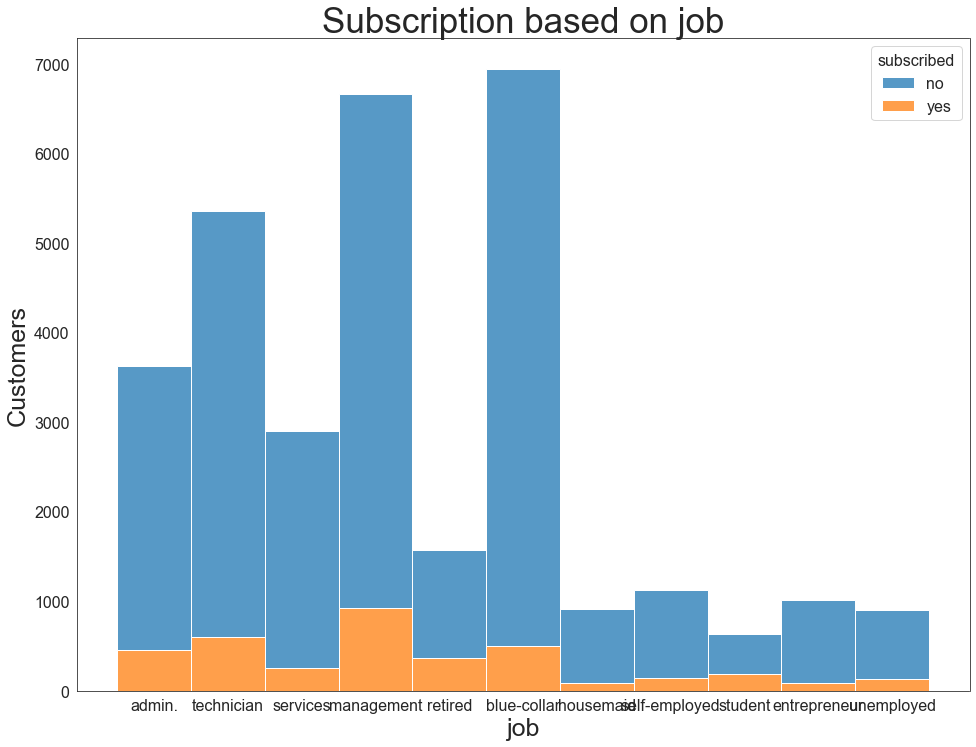

In [127]:
fig=plt.figure(figsize=[16,12])
sb.histplot(df, x = df.job, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on job', fontsize=35)
plt.xlabel('job', fontsize=25)
plt.ylabel('Customers', fontsize=25)
plt.savefig('age_subscription')
plt.savefig('subscribe based on job.jpg')

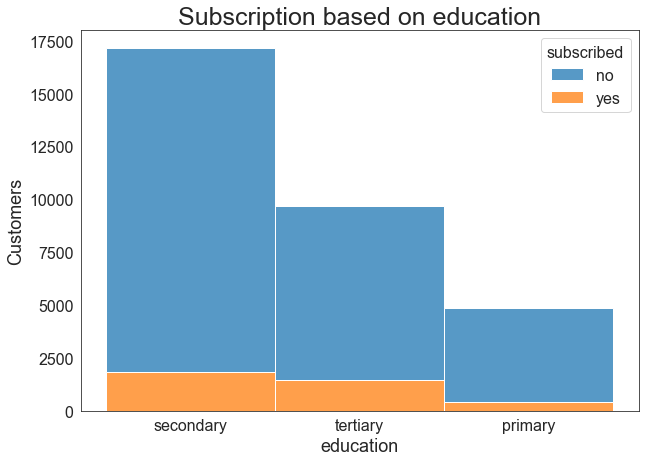

In [128]:
fig=plt.figure(figsize=[10,7])
sb.histplot(df, x = df.education, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on education', fontsize=25)
plt.xlabel('education', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.savefig('subscribe based on educ.jpg')

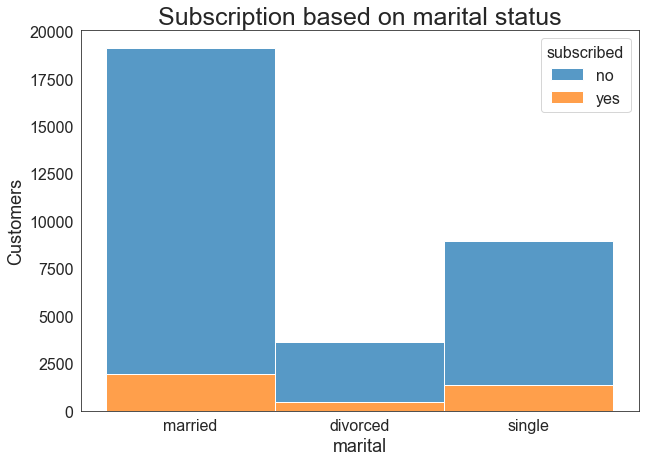

In [129]:
fig=plt.figure(figsize=[10,7])
sb.histplot(df, x = df.marital, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on marital status', fontsize=25)
plt.xlabel('marital', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.savefig('subscribe based on marital.jpg')

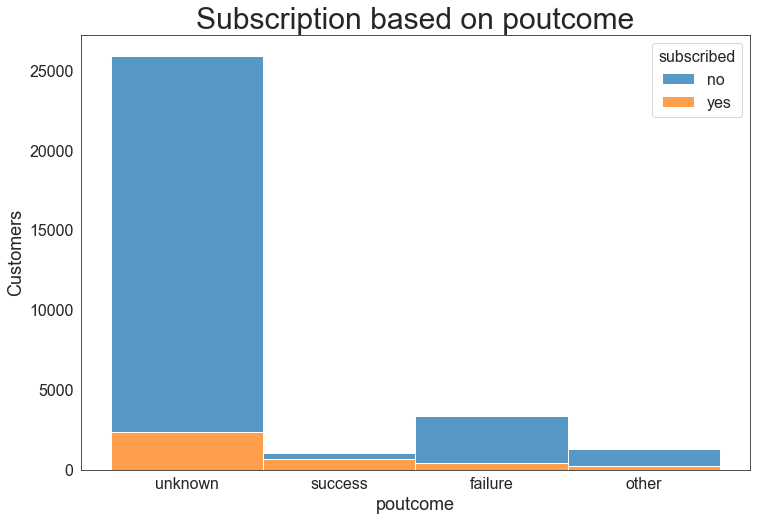

In [130]:
fig=plt.figure(figsize=[12,8])
sb.histplot(df, x = df.poutcome, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on poutcome', fontsize=30)
plt.xlabel('poutcome', fontsize=18)
plt.ylabel('Customers', fontsize=18)
plt.savefig('subscribe based on poutcome.jpg')

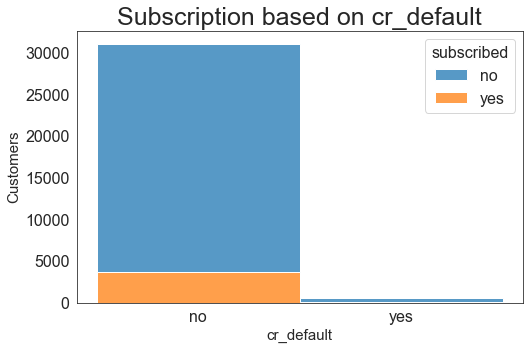

In [131]:
fig=plt.figure(figsize=[8,5])
sb.histplot(df, x = df.cr_default, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on cr_default', fontsize=25)
plt.xlabel('cr_default', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.savefig('subscribe based on cr_default.jpg')

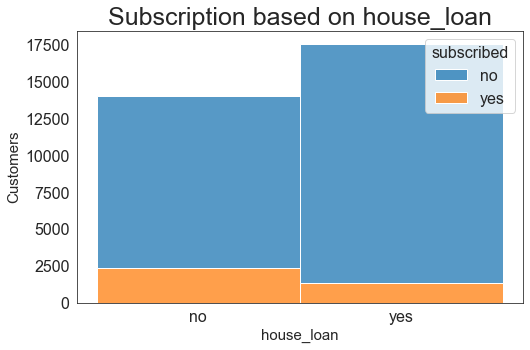

In [132]:
fig=plt.figure(figsize=[8,5])
sb.histplot(df, x = df.house_loan, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on house_loan', fontsize=25)
plt.xlabel('house_loan', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.savefig('subscribe based on house_loan.jpg')

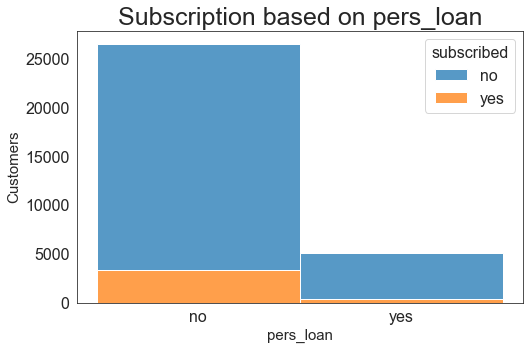

In [133]:
fig=plt.figure(figsize=[8,5])
sb.histplot(df, x = df.pers_loan, hue = df.subscribed, multiple = 'stack')
plt.title('Subscription based on pers_loan', fontsize=25)
plt.xlabel('pers_loan', fontsize=15)
plt.ylabel('Customers', fontsize=15)
plt.savefig('subscribe based on pers_loan.jpg')

In [134]:
df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,no
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,no


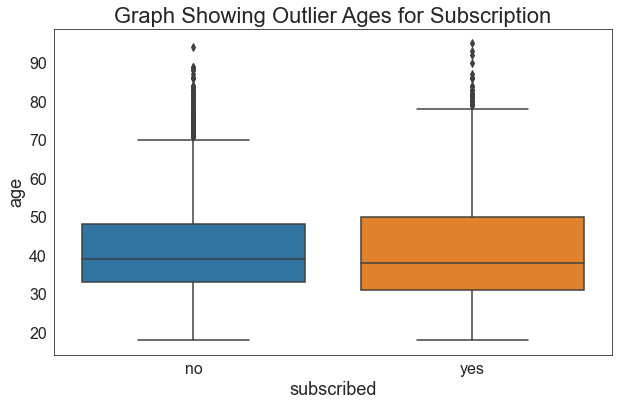

In [135]:
fig=plt.figure(figsize=[10,6])
sb.boxplot(x='subscribed', y='age', data=df)

plt.title('Graph Showing Outlier Ages for Subscription', fontsize=22)
plt.xlabel('subscribed', fontsize=18)
plt.ylabel('age', fontsize=18)
plt.savefig('boxplot1.jpg')

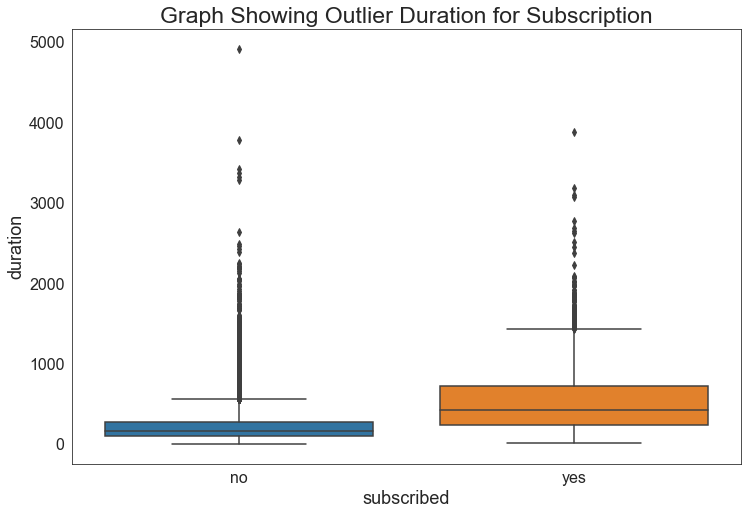

In [136]:
fig=plt.figure(figsize=[12,8])
sb.boxplot(x='subscribed', y='duration', data=df)

plt.title('Graph Showing Outlier Duration for Subscription', fontsize=23)
plt.xlabel('subscribed', fontsize=18)
plt.ylabel('duration', fontsize=18)
plt.savefig('boxplot2.jpg')

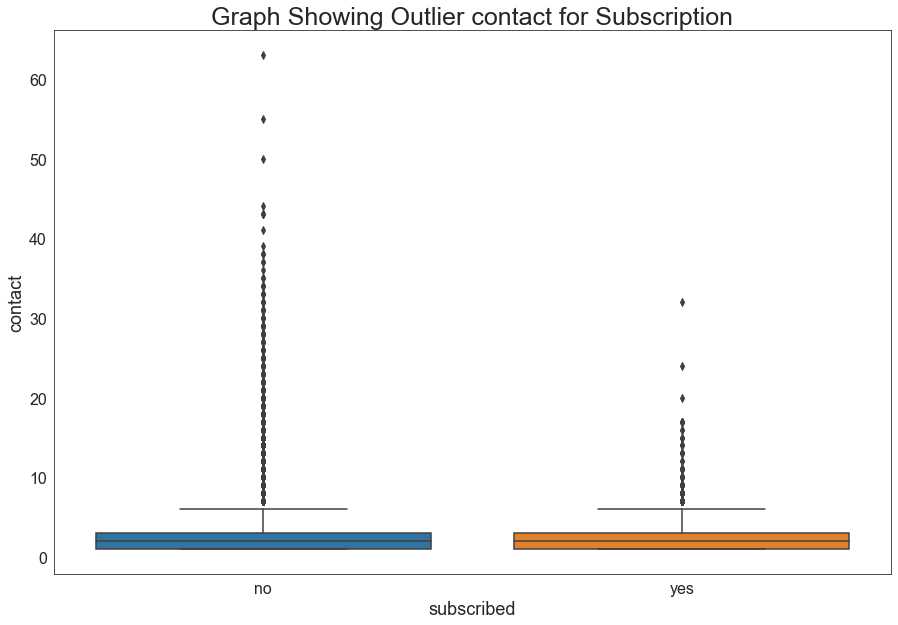

In [137]:
fig=plt.figure(figsize=[15,10])
sb.boxplot(x='subscribed', y='contact', data=df)

plt.title('Graph Showing Outlier contact for Subscription', fontsize=25)
plt.xlabel('subscribed', fontsize=18)
plt.ylabel('contact', fontsize=18)
plt.savefig('boxplot3.jpg')

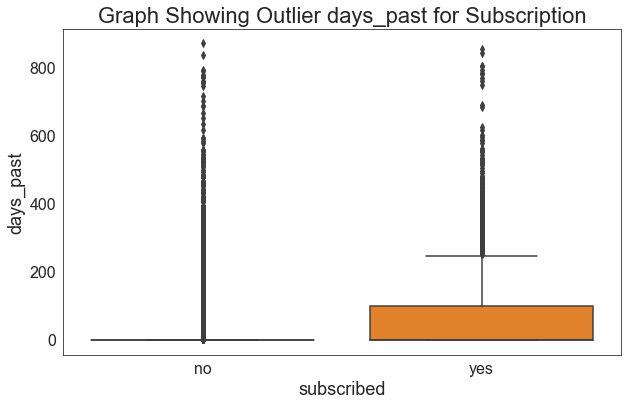

In [138]:
fig=plt.figure(figsize=[10,6])
sb.boxplot(x='subscribed', y='days_past', data=df)

plt.title('Graph Showing Outlier days_past for Subscription', fontsize=22)
plt.xlabel('subscribed', fontsize=18)
plt.ylabel('days_past', fontsize=18)
plt.savefig('boxplot4.jpg')

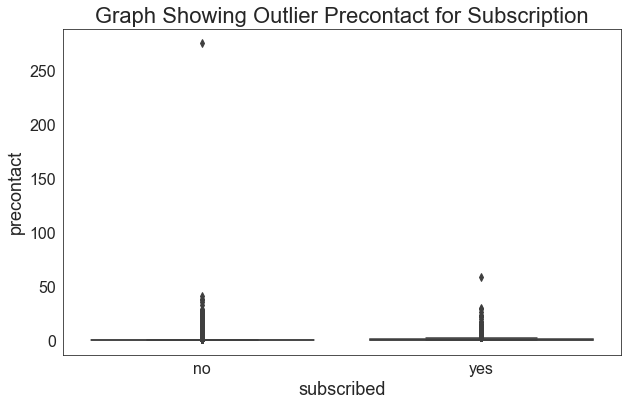

In [139]:
fig=plt.figure(figsize=[10,6])
sb.boxplot(x='subscribed', y='precontact', data=df)

plt.title('Graph Showing Outlier Precontact for Subscription', fontsize=22)
plt.xlabel('subscribed', fontsize=18)
plt.ylabel('precontact', fontsize=18)
plt.savefig('boxplot5.jpg')

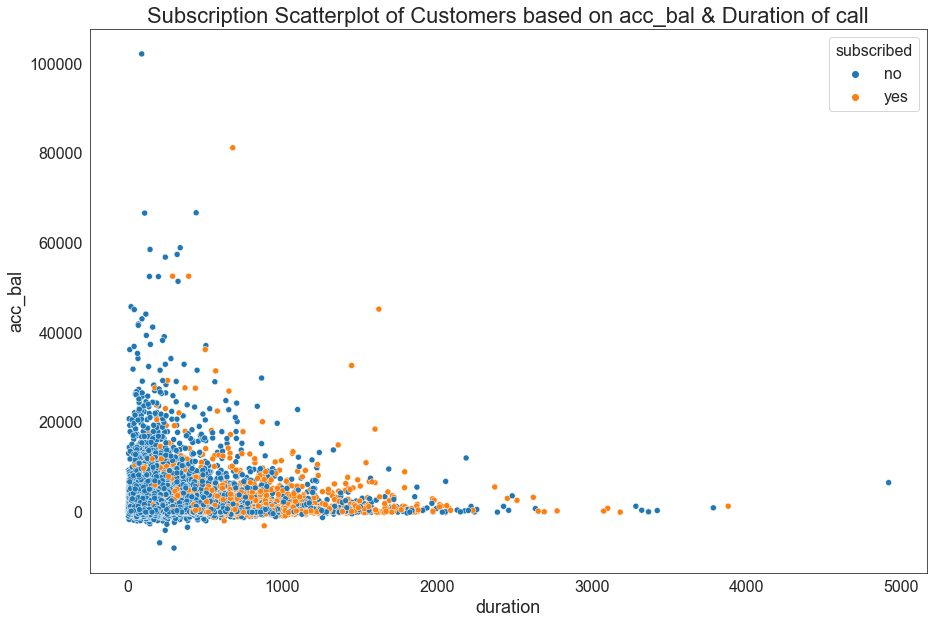

In [140]:
fig=plt.figure(figsize=[15,10])
sb.scatterplot(x="duration", y='acc_bal', data=df, hue='subscribed')

plt.title('Subscription Scatterplot of Customers based on acc_bal & Duration of call', fontsize=22)
plt.xlabel('duration', fontsize=18)
plt.ylabel('acc_bal', fontsize=18)
plt.savefig('scatter1.jpg')

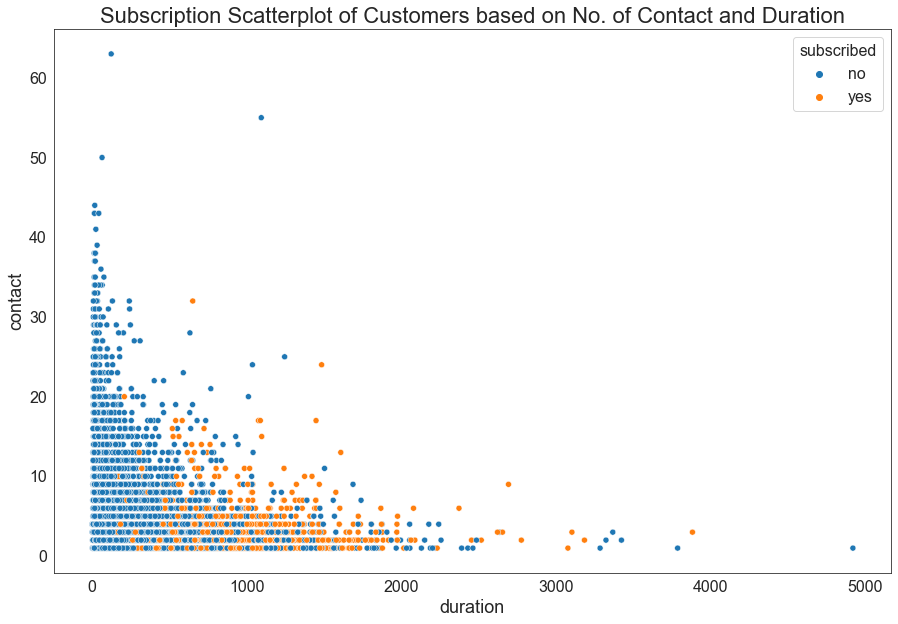

In [141]:
fig=plt.figure(figsize=[15,10])
sb.scatterplot(x="duration", y='contact', data=df, hue='subscribed')

plt.title('Subscription Scatterplot of Customers based on No. of Contact and Duration', fontsize=22)
plt.xlabel('duration', fontsize=18)
plt.ylabel('contact', fontsize=18)
plt.savefig('scatter2.jpg')

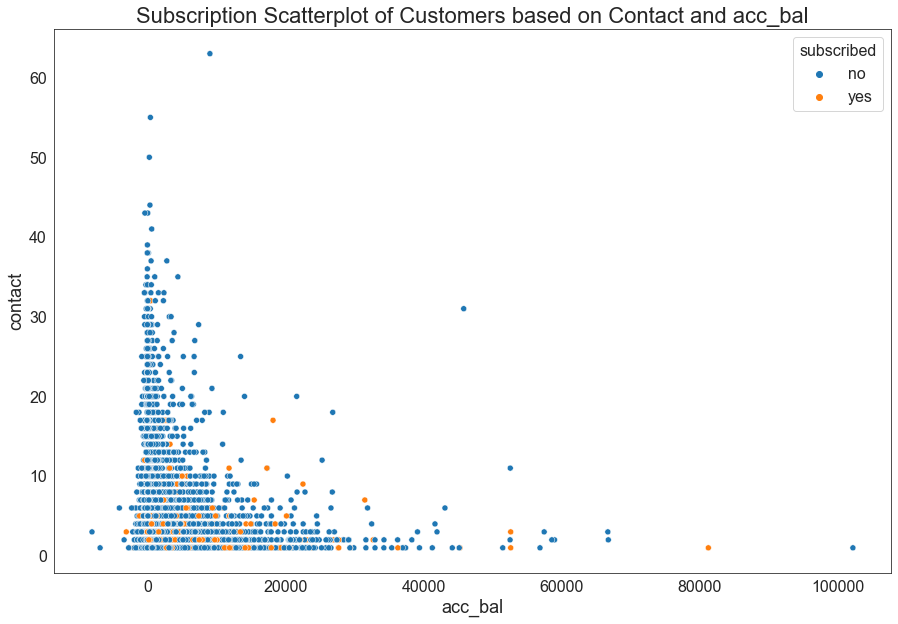

In [142]:
fig=plt.figure(figsize=[15,10])
sb.scatterplot(x="acc_bal", y='contact', data=df, hue='subscribed')

plt.title('Subscription Scatterplot of Customers based on Contact and acc_bal', fontsize=22)
plt.xlabel('acc_bal', fontsize=18)
plt.ylabel('contact', fontsize=18)
plt.savefig('scatter3.jpg')

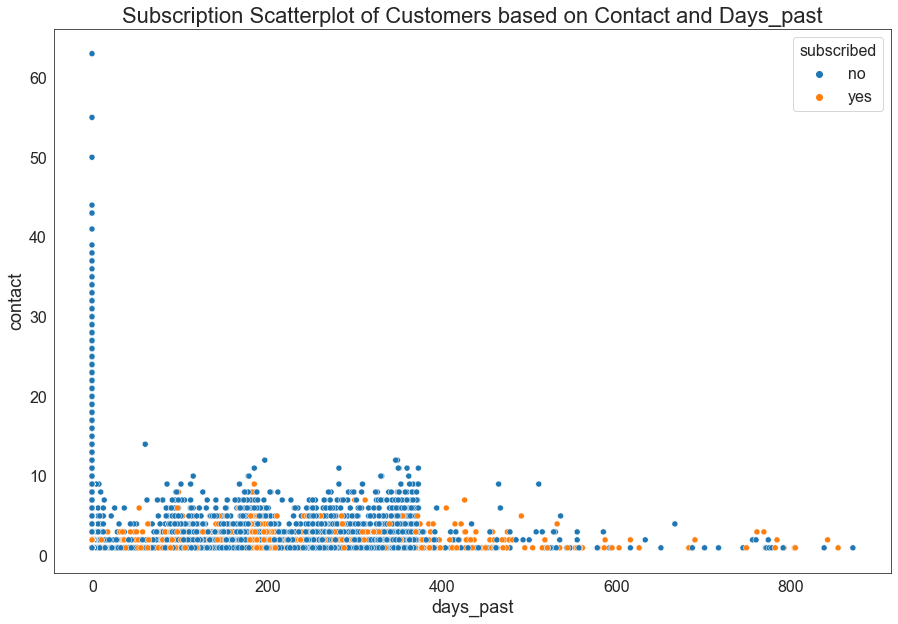

In [143]:
fig=plt.figure(figsize=[15,10])
sb.scatterplot(x="days_past", y='contact', data=df, hue='subscribed')

plt.title('Subscription Scatterplot of Customers based on Contact and Days_past', fontsize=22)
plt.xlabel('days_past', fontsize=18)
plt.ylabel('contact', fontsize=18)
plt.savefig('scatter4.jpg')


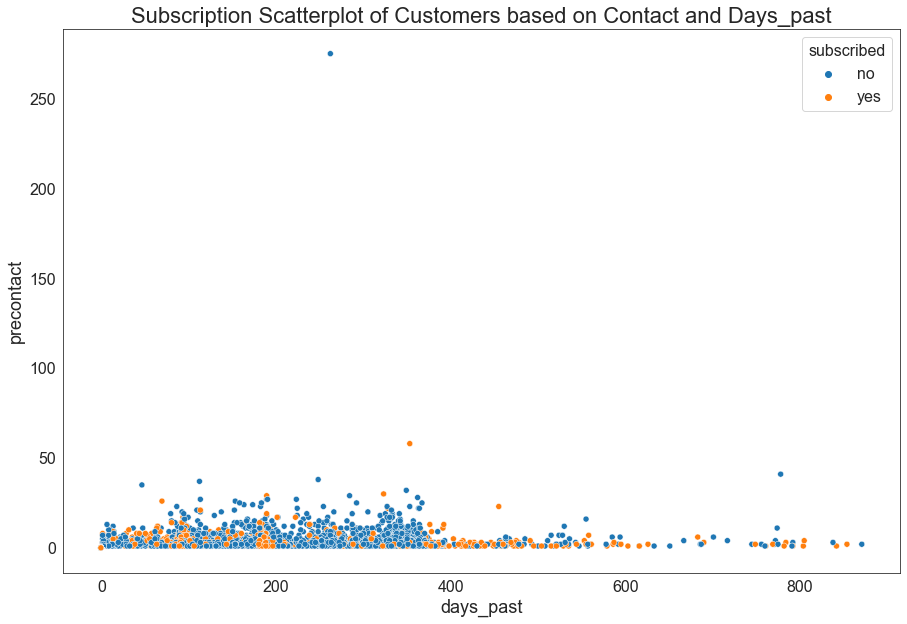

In [144]:
fig=plt.figure(figsize=[15,10])
sb.scatterplot(x="days_past", y='precontact', data=df, hue='subscribed')

plt.title('Subscription Scatterplot of Customers based on Contact and Days_past', fontsize=22)
plt.xlabel('days_past', fontsize=18)
plt.ylabel('precontact', fontsize=18)
plt.savefig('scatter5.jpg')

# 4.1 Train & Test Data using Machine Learning Algorithm
# (Logistic Regression)



In [145]:
df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,no
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,no


In [146]:
df.rename({'subscribed':'subscribe_del'}, axis=1, inplace=True)


In [147]:
subscribed=pd.get_dummies(df.subscribe_del, drop_first=True)
subscribed.columns=['subscribed']

In [148]:
df=pd.concat([df, subscribed], axis=1)

In [149]:
df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribe_del,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,no,0
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,no,0


In [150]:
df.drop('subscribe_del', axis=1, inplace=True)

In [151]:
df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,0
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,0


# 4.1.1 Converting classes into numerical values using Label Encoder

In [152]:
label_df = df.copy()

In [153]:

from sklearn.preprocessing import LabelEncoder
laben = LabelEncoder()



label_df['job'] = laben.fit_transform(label_df['job'])
label_df['marital'] = laben.fit_transform(label_df['marital'])
label_df['education'] = laben.fit_transform(label_df['education'])
label_df['cr_default'] = laben.fit_transform(label_df['cr_default'])
label_df['house_loan'] = laben.fit_transform(label_df['house_loan'])
label_df['pers_loan'] = laben.fit_transform(label_df['pers_loan'])

#laben_df_dic=dict(zip(laben.transform(laben.classes_),laben.classes_)) #Helps us translate predictions


In [154]:
label_df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribed
0,56,0,1,1,0,1933,0,0,44,2,-1,0,unknown,0
1,31,9,1,1,0,3,0,0,91,2,-1,0,unknown,0


In [155]:
label_df.poutcome.value_counts()

unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

In [156]:
label_df[df.poutcome=='unknown'].value_counts().sum()*100/len(label_df)

81.93193667646223

In [157]:
# Given that 81.93% of the data in 'prev_outcome' column are unknown, we will drop this column from our dataset
# since making use of it will be misleading.

label_df.drop('poutcome', axis=1, inplace=True)

In [158]:
label_df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,subscribed
0,56,0,1,1,0,1933,0,0,44,2,-1,0,0
1,31,9,1,1,0,3,0,0,91,2,-1,0,0


In [159]:
label_df.describe()

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,subscribed
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.957247,4.284735,1.167220,1.152305,0.018485,1363.890258,0.555629,0.162132,258.113534,2.765697,39.576042,0.574272,0.117389
std,10.625134,3.237806,0.607186,0.659638,0.134700,3028.304293,0.496904,0.368578,257.118973,3.113830,99.317592,2.422529,0.321888
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,73.000000,0.000000,0.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,450.000000,1.000000,0.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1431.000000,1.000000,0.000000,318.500000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,10.000000,2.000000,2.000000,1.000000,102127.000000,1.000000,1.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [160]:
label_df.corr()

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,subscribed
age,1.000000,-0.031630,-0.406024,-0.155794,-0.016117,0.103245,-0.183775,-0.012657,-0.003870,0.005733,-0.021947,0.005761,0.024538
job,-0.031630,1.000000,0.067688,0.199834,-0.004099,0.018728,-0.112144,-0.033442,0.004068,-0.001121,-0.020478,-0.001345,0.038967
marital,-0.406024,0.067688,1.000000,0.117870,-0.009591,0.003487,-0.017846,-0.041654,0.011544,-0.009394,0.019741,0.012717,0.046043
education,-0.155794,0.199834,0.117870,1.000000,-0.007859,0.067873,-0.078102,-0.025016,0.006475,0.002821,0.004044,0.020249,0.067445
cr_default,-0.016117,-0.004099,-0.009591,-0.007859,1.000000,-0.069422,-0.011823,0.081567,-0.010849,0.018538,-0.029622,-0.015877,-0.020168
acc_bal,0.103245,0.018728,0.003487,0.067873,-0.069422,1.000000,-0.067466,-0.083631,0.024274,-0.012032,0.001789,0.013843,0.050807
house_loan,-0.183775,-0.112144,-0.017846,-0.078102,-0.011823,-0.067466,1.000000,0.036244,0.003021,-0.021076,0.118790,0.034231,-0.141092
pers_loan,-0.012657,-0.033442,-0.041654,-0.025016,0.081567,-0.083631,0.036244,1.000000,-0.012781,0.009340,-0.020078,-0.009258,-0.072266
duration,-0.003870,0.004068,0.011544,0.006475,-0.010849,0.024274,0.003021,-0.012781,1.000000,-0.080305,0.000529,0.001783,0.389838
contact,0.005733,-0.001121,-0.009394,0.002821,0.018538,-0.012032,-0.021076,0.009340,-0.080305,1.000000,-0.087570,-0.033151,-0.070607


In [161]:
mask=np.zeros_like(label_df.corr())
mask


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [162]:
triangle_indices=np.triu_indices_from(mask)
mask[triangle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

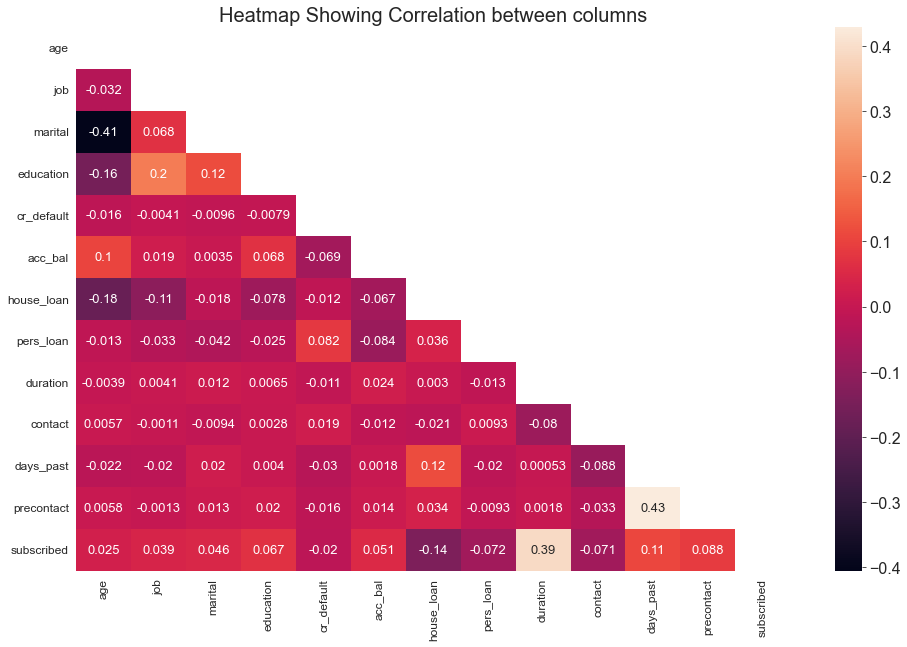

In [163]:
plt.figure(figsize=(16,10))
sb.heatmap(label_df.corr(), mask=mask, annot=True, annot_kws={'size':13})
sb.set_style('white')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Heatmap Showing Correlation between columns', fontsize=20)
plt.show()
plt.rcParams.update({'font.size': 16})

# 4.1.2 Choosing the Variables

    The heatmap above, reveals a positive regression between our response variable (y ='subscribed') and the following:
    'age', 'job', 'marital', 'education', 'acc_bal', 'duration', 'days_past', and 'precontact'. Therefore, these will
    be used as our prdictor variables (X) for training and testing our model.

In [164]:
label_df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,subscribed
0,56,0,1,1,0,1933,0,0,44,2,-1,0,0
1,31,9,1,1,0,3,0,0,91,2,-1,0,0


# 4.1.3 Training & Testing our Data using Label Encoder

In [165]:
from sklearn.model_selection import train_test_split

In [166]:
# X variables include: 'age', 'job', 'marital', 'education', 'acc_bal', 'duration', 'days_past', and 'precontact'

X=label_df.iloc[:,[0,1,2,3,5,8,10,11]]

y=label_df.subscribed

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [168]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression(max_iter=32000)

In [169]:
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=32000)

In [170]:
prediction=LogReg.predict(X_test)

In [171]:
from sklearn.metrics import classification_report, confusion_matrix

In [172]:
classification_report (y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94      8385\n           1       0.56      0.19      0.28      1110\n\n    accuracy                           0.89      9495\n   macro avg       0.73      0.58      0.61      9495\nweighted avg       0.86      0.89      0.86      9495\n'

In [173]:
confusion_matrix(y_test, prediction)

array([[8220,  165],
       [ 900,  210]], dtype=int64)

In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test, prediction)

0.8878357030015798

In [176]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#make an instance of a KNeighborsClassifier object
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=1)

In [177]:
y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.8445497630331753


# 4.2.1 Converting classes into numerical values using OneHotEncoder

In [178]:
ohe_df = df.copy()
ohe_df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,poutcome,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,unknown,0
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,unknown,0


In [179]:
ohe_df.drop('poutcome', axis=1, inplace=True)
ohe_df.head(2)

,age,job,marital,education,cr_default,acc_bal,house_loan,pers_loan,duration,contact,days_past,precontact,subscribed
0,56,admin.,married,secondary,no,1933,no,no,44,2,-1,0,0
1,31,technician,married,secondary,no,3,no,no,91,2,-1,0,0


In [180]:
from sklearn.preprocessing import OneHotEncoder

In [181]:
#creating an instance of One Hot Encoder

ohe = OneHotEncoder()

In [182]:

encode_df = pd.DataFrame(ohe.fit_transform(ohe_df[['job', 'marital', 'education', 'cr_default', 'house_loan', 'pers_loan']]).toarray())

In [183]:
ohe.fit(ohe_df[['job', 'marital', 'education', 'cr_default', 'house_loan', 'pers_loan']])

OneHotEncoder()

In [184]:
ohe.transform(ohe_df[['job', 'marital', 'education', 'cr_default', 'house_loan', 'pers_loan']])

<31647x23 sparse matrix of type '<class 'numpy.float64'>'
	with 189882 stored elements in Compressed Sparse Row format>

In [185]:
ohe_df=pd.get_dummies(data=ohe_df)

In [186]:
ohe_df.head()

,age,acc_bal,duration,contact,days_past,precontact,subscribed,job_admin.,job_blue-collar,job_entrepreneur,...,marital_single,education_primary,education_secondary,education_tertiary,cr_default_no,cr_default_yes,house_loan_no,house_loan_yes,pers_loan_no,pers_loan_yes
0,56,1933,44,2,-1,0,0,1,0,0,...,0,0,1,0,1,0,1,0,1,0
1,31,3,91,2,-1,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,27,891,240,1,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0
3,57,3287,867,1,84,3,1,0,0,0,...,0,0,0,1,1,0,1,0,1,0
4,31,119,380,1,-1,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1,0


In [187]:
ohe_df.columns

Index(['age', 'acc_bal', 'duration', 'contact', 'days_past', 'precontact',
       'subscribed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'cr_default_no', 'cr_default_yes', 'house_loan_no', 'house_loan_yes',
       'pers_loan_no', 'pers_loan_yes'],
      dtype='object')

In [188]:
ohe_df.drop(['cr_default_no', 'house_loan_no', 'pers_loan_no'], axis=1, inplace=True)

In [189]:
ohe_df.columns

Index(['age', 'acc_bal', 'duration', 'contact', 'days_past', 'precontact',
       'subscribed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'cr_default_yes', 'house_loan_yes', 'pers_loan_yes'],
      dtype='object')

In [190]:
ohe_df.head(2)

,age,acc_bal,duration,contact,days_past,precontact,subscribed,job_admin.,job_blue-collar,job_entrepreneur,...,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,cr_default_yes,house_loan_yes,pers_loan_yes
0,56,1933,44,2,-1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
1,31,3,91,2,-1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


# 4.2.2 Training & Testing Data under One Hot Encoder

In [191]:
#from sklearn.cross_validation import train_test_split

from sklearn.model_selection import train_test_split

In [192]:
ohe_df.columns

Index(['age', 'acc_bal', 'duration', 'contact', 'days_past', 'precontact',
       'subscribed', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'cr_default_yes', 'house_loan_yes', 'pers_loan_yes'],
      dtype='object')

In [193]:
#  X variables include: 'age', 'job', 'marital', 'education', 'acc_bal', 'duration', 'days_past', and 'precontact'

# job and education encoded in:
# column 0 (index 12) to column 13 (index 25)

X = ohe_df.iloc[:,[0,1,2,4,5,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]

In [194]:
# our response variable
y = ohe_df.subscribed

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [196]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(max_iter=32000)

In [197]:
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

In [198]:
LogReg.fit(X_train, y_train)

LogisticRegression(max_iter=32000)

In [199]:
prediction=LogReg.predict(X_test)

In [200]:
from sklearn.metrics import classification_report, confusion_matrix

In [201]:
classification_report (y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.90      0.98      0.94      8385\n           1       0.56      0.20      0.29      1110\n\n    accuracy                           0.89      9495\n   macro avg       0.73      0.59      0.62      9495\nweighted avg       0.86      0.89      0.86      9495\n'

In [202]:
confusion_matrix(y_test, prediction)

array([[8214,  171],
       [ 890,  220]], dtype=int64)

In [203]:
from sklearn.metrics import accuracy_score

In [204]:
accuracy_score(y_test, prediction)

0.8882569773565034

In [205]:
LogReg.score(X,y)

0.8883622460264796

# 5.1 Conclusion

Having used both Label Encoder and One Hot Encoder for preprocessing our data for Machine Learning purposes,

we got the following accuracy results:

Label Encoder: 88.78%

One Hot Encoder: 88.83

(Variance = 0.05%)


Since One Hot Encoder has a slight higher accuracy level of prediction (88.83%) than Label Encoder (88.78%),

it is recommended that One Hot Encoder algorithm be used for such Machine Learning predictions.


However, it should be noted that One Hot Encoder algorithm has one disadvatage over Label Encoder:

    it gives rise to numerous columns when the cardinality of the categorical variables is high (as we saw earlier
    in our case above). This leads to the creation of multiple columns, making the visibility of all columns in
    the dataset impossible under the One Hot Encoder method).

# 5.2 Final Conclusion

Accuracy Results: 88.83%


According to our Machine Learning model, if we apply our predictor variables ('age', 'job', 'marital', 'education',

'acc_bal', 'duration', 'days_past', and 'precontact') in customer relation we will be able to convince our customers

to subscribe to a term deposit account in our bank. And we will achieve this with an accuracy level of 88.83%

based on our Machine Learning prediction model. 
